In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

In [3]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()


In [4]:
x_train, y_train = TRAIN_SIZE(55000)

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)



[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


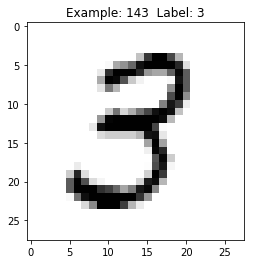

In [5]:
display_digit(ran.randint(0, x_train.shape[0]))


In [6]:
import tensorflow as tf
sess = tf.Session()

#Input Data
x = tf.placeholder(tf.float32, shape=[None, 784])
#Label
y_ = tf.placeholder(tf.float32, shape=[None, 10])

#Model parameter
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# Prediction model
y = tf.nn.softmax(tf.matmul(x,W) + b)

# Cost function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [18]:
# Load dataset
x_train, y_train = TRAIN_SIZE(20000)
x_test, y_test = TEST_SIZE(10000)
LEARNING_RATE = 0.1
TRAIN_STEPS = 2500

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (20000, 784)
y_train Examples Loaded = (20000, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)


In [19]:
# Initialize all variables so that they can be used by our TensorFlow graph
init = tf.global_variables_initializer()
sess.run(init)

In [20]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Training Step:0  Accuracy =  0.6556  Loss = 2.19642
Training Step:100  Accuracy =  0.8724  Loss = 0.607983
Training Step:200  Accuracy =  0.8877  Loss = 0.488162
Training Step:300  Accuracy =  0.8952  Loss = 0.438328
Training Step:400  Accuracy =  0.8988  Loss = 0.409405
Training Step:500  Accuracy =  0.9025  Loss = 0.389884
Training Step:600  Accuracy =  0.9046  Loss = 0.375513
Training Step:700  Accuracy =  0.9058  Loss = 0.364319
Training Step:800  Accuracy =  0.9075  Loss = 0.355249
Training Step:900  Accuracy =  0.9097  Loss = 0.347684
Training Step:1000  Accuracy =  0.9103  Loss = 0.341233
Training Step:1100  Accuracy =  0.9108  Loss = 0.335633
Training Step:1200  Accuracy =  0.9112  Loss = 0.330705
Training Step:1300  Accuracy =  0.9127  Loss = 0.326317
Training Step:1400  Accuracy =  0.9126  Loss = 0.322371
Training Step:1500  Accuracy =  0.9133  Loss = 0.318795
Training Step:1600  Accuracy =  0.9136  Loss = 0.31553
Training Step:1700  Accuracy =  0.9141  Loss = 0.312532
Traini

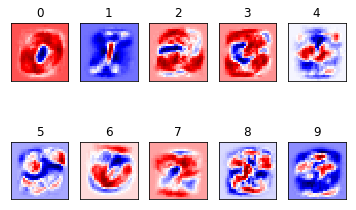

In [22]:
def display_weight(): 
    for i in range(10):
        plt.subplot(2, 5, i+1)
        weight = sess.run(W)[:,i]
        plt.title(i)
        plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
display_weight()

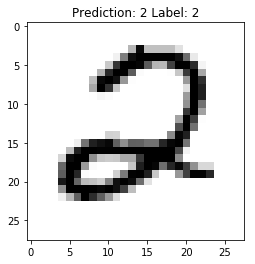

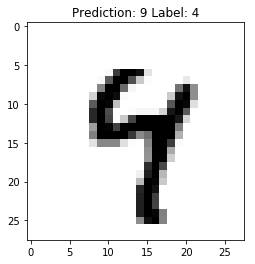

In [24]:
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    # THIS GETS OUR LABEL AS A INTEGER
    label = y_train.argmax()
    # THIS GETS OUR PREDICTION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train}).argmax()
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_compare(ran.randint(0, 55000))
display_compare(2)